# Telecomunicaciones - Eficiencia en Operadores

**Link Google Drive**: Presentacion PDF - Dashboard
https://drive.google.com/drive/folders/1vh9BrP7nQ5dhtZnhXcpO0TX80lIheSds?usp=drive_link 

## Objetivo de Estudio 
EL proposito de este proyecto es estableer metricas para la distincion de operadores segun su eficiencia. Para ello es neesario consultar KPIs (Indicadores Clave de Desempeño por sus siglas en ingles) empleadas en las empresas del rubro, las cuales despues de una investigacion externa encontramos las siguientes: 
1. Tiempo Promedio de Operación (Average Handle Time - AHT)
Es el tiempo total invertido en una interacción, desde que se contesta hasta que se cierran las notas administrativas. Es el indicador primario de la agilidad del operador.
    - Referencia: "El AHT es fundamental para dimensionar la fuerza laboral y asegurar que los costos operativos se mantengan dentro de los márgenes previstos" (Gartner, 2022).
      
2. Tiempo Medio de Respuesta (Average Speed of Answer - ASA)
NUEVA MÉTRICA: Mide cuánto tiempo espera un cliente en la cola antes de ser atendido por un operador. Refleja si el equipo de operadores es suficiente para el volumen de llamadas.

    - Referencia: El Customer Service Institute of America (2024) establece que el ASA es el principal predictor del abandono de llamadas; a mayor tiempo de espera, mayor es la tasa de deserción.

3. Resolución en la Primera Llamada (First Call Resolution - FCR)
Mide la eficiencia cualitativa. Si un operador es rápido pero no resuelve, el costo operativo se duplica cuando el cliente vuelve a llamar.

    - Referencia: Según Dixon et al. (2010) en Harvard Business Review, reducir el esfuerzo del cliente mediante la resolución inmediata es el factor que más impacta en la lealtad en servicios de telecomunicaciones.

  
4. Llamadas Realizadas por Hora (Outbound Calls per Hour)
Mide la productividad proactiva de un operador. En proyectos de retención o cobranza de telecomunicaciones, determina el ritmo de trabajo del agente en campañas de salida.

    - Cita: "La eficiencia en campañas outbound no solo se mide por el volumen, sino por la relación entre llamadas realizadas y contactos efectivos alcanzados" (IFC, 2023).

5. Llamadas No Atendidas por el Agente (Agent No Answer - ANA)
Mide la cantidad de veces que una llamada suena en la extensión de un operador y, tras un tiempo determinado (ej. 15 segundos), el sistema la retira porque el operador no contestó.

    - Cita: "El RONA es una métrica de fuga de eficiencia pura; cada llamada no contestada por un agente disponible incrementa el tiempo de espera del cliente en al menos un 30% adicional al reingresar a la cola" (Gartner, 2022).
  
Cada uno de estos indicadores seran la base para el calculo de la eficiencia, pero puede ser modificados a la nesecidad y la informacion disponible del proyecto.
Las formulas se presentaran en cada uno de los pasos.
### Pasos 
1. Limpieza de datos:
    - Imprimiremos una muestra de los datos
    - Buscaremos errores en el formato de la informacion
    - Cambiaremos el formato y limpiaremos los datos
2. Exploracion de datos:
   - Analizaremos los datos contenidos en cada columna para determinar si existen outlier o valores  atipicos, asdi como prevenir cualquier inconveniente 
3. Medicion de KPIs:
    - Para cada indicador desglosaremos en un cuadro de texto la formula y las columnas a utilizar
    - Tendremos un apartado de exploracion donde:
        1. Observaremos los promedios, percentiles y otras metricas.
        2. Designaremos las metricas de un operador eficiente y uno que no
        3. Comprobaremos las diferiencias 
    - Etiquetaremos o filtraremos  los operadores segun los parametros establesidos
    -  Observaremos resultados, daremos concluciones y recomendaciones  

### Importamos Librerias 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from scipy.stats import f_oneway
from scipy.stats import tukey_hsd

### Importamos los Datos 

In [25]:
# Importamos y guardamos los datos en df
customers= pd.read_csv('telecom_clients.csv', sep=',')
calls= pd.read_csv('telecom_dataset_new.csv', sep=',')


## Limpieza de datos 

### Customers

In [26]:
# Impromimos las primeras 5 filas del df
display(customers.head())

# Imprimimos la informacion del df
print()

print()
customers.info()


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


### Observaciones 
La columna date_start contiene fechas pero se encuentra en formato de texto lo cual se debe de cambiar.

In [27]:
# Damos formato de tiempo a la columna date_start 
customers['date_start']= pd.to_datetime(customers['date_start'])

# Comprobamos
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


### Calls

In [28]:
# Impromimos las primeras 5 filas del df
display(calls.head())

# Imprimimos la informacion del df
print()

print()
calls.info()


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


### Observaciones
- La columna date contiene fechas pero se encuentra en formato texto ademas de no contener informacion de horaria.
- La columna operator_id se encuentra en formato flotante  y  debe de ser entero, ademas contene datos nulos los cuales no permitiran que se cambie el formato. Esta columna tambien es clave para el objeto de estudio ya que es el identificador del operador por lo cual antes de eliminar o remplasar los datos ausentes calcularemos su porcentaje
- La columna internal contiene datos nulos 


In [29]:
# Calculamos los datos ausentes
print('Los datos totales son:',len(calls))
print('Los datos ausentes de la columna (operator_id) son:',calls['operator_id'].isna().sum())
print('El porcentaje de datos nulos de la columna (operator_id) es: {:.2f}%'.format((calls['operator_id'].isna().sum()/len(calls))*100))
print('Los datos ausentes de la columna (internal) son:',calls['internal'].isna().sum())
print('El porcentaje de datos nulos de la columna (internal) es: {:.2f}%'.format((calls['internal'].isna().sum()/len(calls))*100))


Los datos totales son: 53902
Los datos ausentes de la columna (operator_id) son: 8172
El porcentaje de datos nulos de la columna (operator_id) es: 15.16%
Los datos ausentes de la columna (internal) son: 117
El porcentaje de datos nulos de la columna (internal) es: 0.22%


### Observaciones
Considerando que el volumen total de los datos nulos no superan el 16 % de los datos y que al no contar con el identificador del operador, la informacion no es utiil decidimos borrar las filas de datos ausentes.

In [30]:
# Borramos datos ausentes 
calls= calls.dropna()

# Damos formato de fecha a la columna date 
calls['date']= pd.to_datetime(calls['date']).dt.date

# Damos formato de numero entero a la columna operator_id 
calls['operator_id']= calls['operator_id'].astype(int)

# Comporbamos
calls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              45670 non-null  int64 
 1   date                 45670 non-null  object
 2   direction            45670 non-null  object
 3   internal             45670 non-null  object
 4   operator_id          45670 non-null  int64 
 5   is_missed_call       45670 non-null  bool  
 6   calls_count          45670 non-null  int64 
 7   call_duration        45670 non-null  int64 
 8   total_call_duration  45670 non-null  int64 
dtypes: bool(1), int64(5), object(3)
memory usage: 3.2+ MB


## Exploracion de Datos 

### Date

In [31]:
# Calculamos la fecha maxima y minima 
print('Primer registro:',calls['date'].min())
print('Ultimo registro:',calls['date'].max())

Primer registro: 2019-08-02
Ultimo registro: 2019-11-28


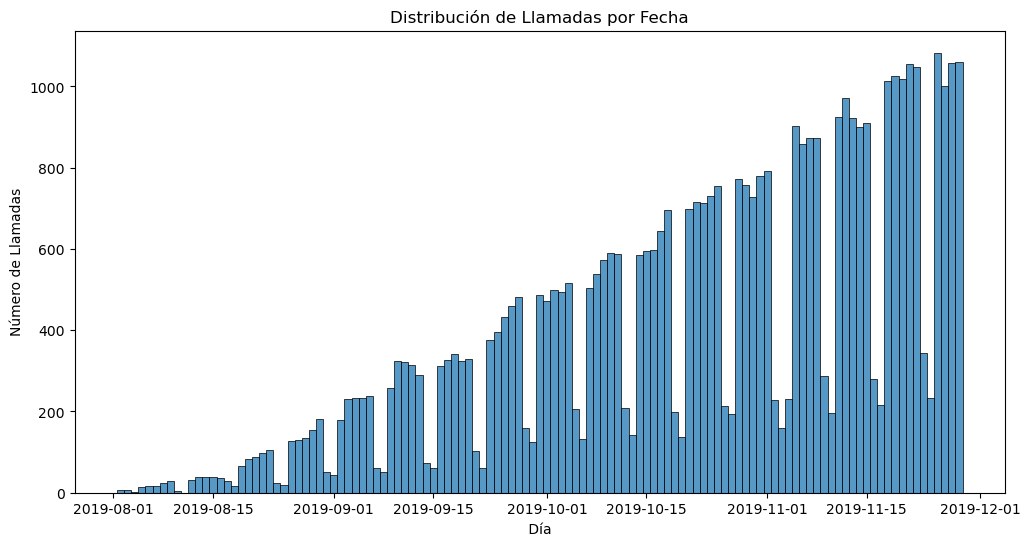

In [32]:
# Creamos un histograma para analizar la distribucion 
plt.figure(figsize=(12, 6))
sns.histplot(data=calls, x='date', bins=24, kde=False)
plt.title('Distribución de Llamadas por Fecha')
plt.xlabel(' Día ')
plt.ylabel('Número de Llamadas')
plt.show()



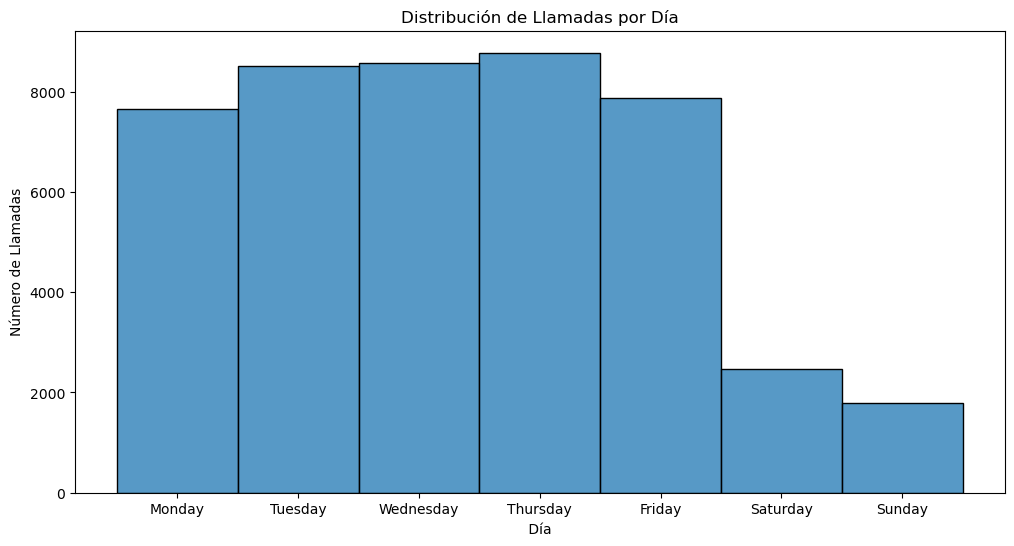

In [33]:
# Creamos un histograma para analizar la distribucion por dias de la semana 
plt.figure(figsize=(12, 6))
sns.histplot(data=calls, x=pd.to_datetime(calls['date']).dt.day_name(), bins=24, kde=False)
plt.title('Distribución de Llamadas por Día')
plt.xlabel(' Día ')
plt.ylabel('Número de Llamadas')
plt.show()


### Observacion 
Las llamadas van aumentando de forma gradual sin identificar valores atipicos. Podemos ver com,o los fines de semana hay menor volumen de llamadas.


## Direction

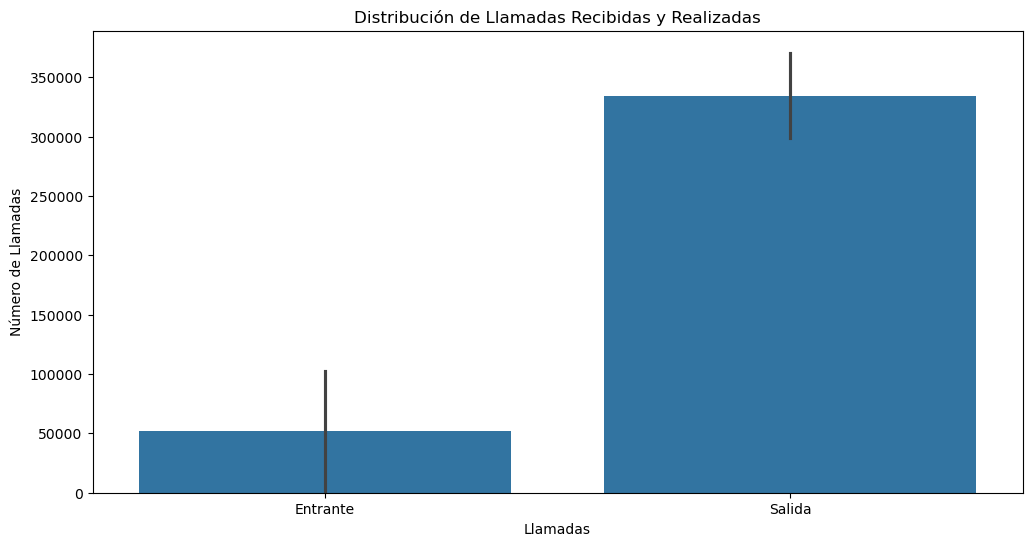

El numero de llamadas realizadas por el operador es: 669343
El numero de llamadas recibidas es: 103631
La diferiencia de llamadas es: 565712
El porcentaje de llamadas realizadas por el operador es:86.59%
El porcentaje de llamadas recibidas es:13.41%


In [34]:

# calculamos el total de las llamadas entrantes y realizadas por el operador
direction_totals = calls.groupby(['direction','is_missed_call'])['calls_count'].sum().reset_index()
# Creamos un grafico de barras para analizar la distribucion 
plt.figure(figsize=(12, 6))
sns.barplot(data=direction_totals, x='direction',y='calls_count')
plt.xticks([0, 1], ['Entrante', 'Salida'])
plt.title('Distribución de Llamadas Recibidas y Realizadas')
plt.xlabel('Llamadas')
plt.ylabel('Número de Llamadas')
plt.show()

# Calculamos el numero y porcentaje de llamadas entrantes y realizadas por el operador
print('El numero de llamadas realizadas por el operador es:',(calls['calls_count'][calls['direction']=='out'].sum()))
print('El numero de llamadas recibidas es:',(calls['calls_count'][calls['direction']=='in'].sum()))
print('La diferiencia de llamadas es:',(calls['calls_count'][calls['direction']=='out'].sum())-(calls['calls_count'][calls['direction']=='in'].sum()))
print('El porcentaje de llamadas realizadas por el operador es:{:.2f}%'.format((100*calls['calls_count'][calls['direction']=='out'].sum())/(calls['calls_count'].sum())))
print('El porcentaje de llamadas recibidas es:{:.2f}%'.format((100*calls['calls_count'][calls['direction']=='in'].sum())/(calls['calls_count'].sum())))



### Observaciones
El 86% de las llamadas son Realizadas por el operador 

##  Internal

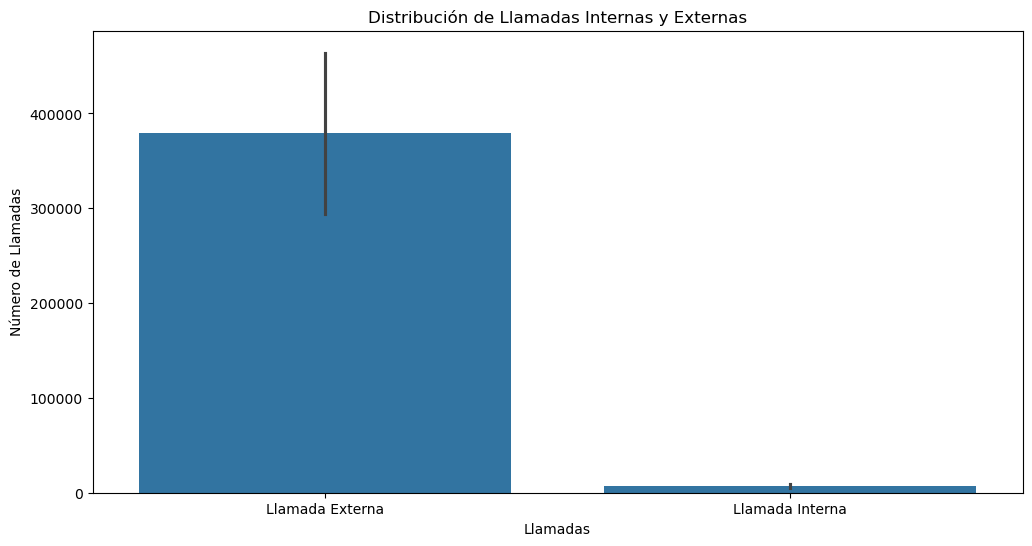

El numero de llamadas internas es: 14818
El numero de llamadas externas es: 758156
La diferiencia de llamadas es: 743338
El porcentaje de llamadas internas es:1.92%
El porcentaje de llamadas externas es:98.08%


In [35]:
# calculamos el total de las llamadas internas y externas
direction_totals = calls.groupby(['internal','is_missed_call'])['calls_count'].sum().reset_index()
# Creamos un grafico de barras para analizar la distribucion 
plt.figure(figsize=(12, 6))
sns.barplot(data=direction_totals, x='internal',y='calls_count')
plt.xticks([0, 1], ['Llamada Externa', 'Llamada Interna'])
plt.title('Distribución de Llamadas Internas y Externas')
plt.xlabel('Llamadas')
plt.ylabel('Número de Llamadas')
plt.show()

# Calculamos el numero y porcentaje de llamadas internas y externas 
print('El numero de llamadas internas es:',(calls['calls_count'][calls['internal']==True].sum()))
print('El numero de llamadas externas es:',(calls['calls_count'][calls['internal']==False].sum()))
print('La diferiencia de llamadas es:',(calls['calls_count'][calls['internal']==False].sum())-(calls['calls_count'][calls['internal']==True].sum()))
print('El porcentaje de llamadas internas es:{:.2f}%'.format((100*calls['calls_count'][calls['internal']==True].sum())/(calls['calls_count'].sum())))
print('El porcentaje de llamadas externas es:{:.2f}%'.format((100*calls['calls_count'][calls['internal']==False].sum())/(calls['calls_count'].sum())))



### Observacion 
El numero de llamadas realizadas al interior de la compañia no superan el 2% 

## Operator_id

In [36]:
# Calculamos el numero de operadores 
print('El numero de operadores es:',calls['operator_id'].nunique())

El numero de operadores es: 1092


## is_missed_call

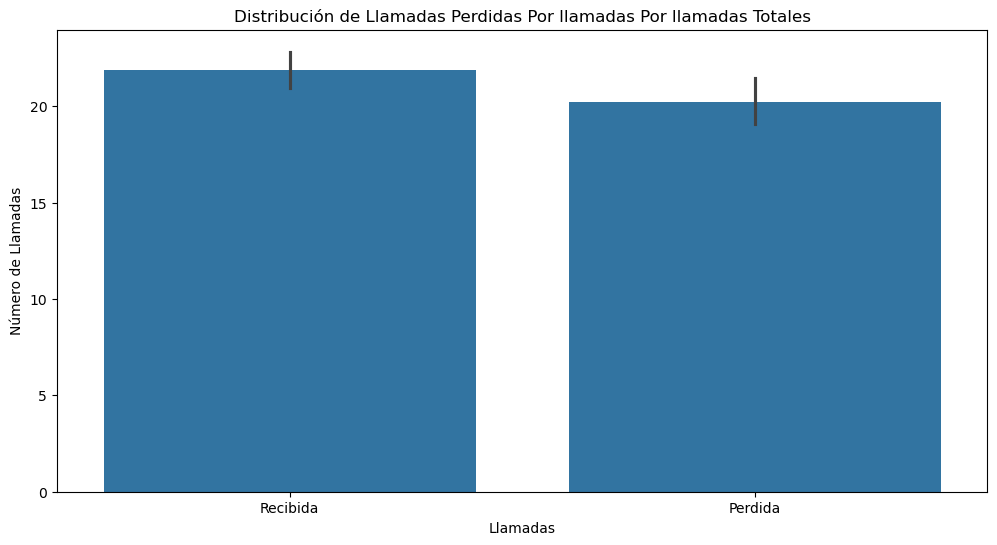

El numero de llamadas contestadas es: 370717
El numero de llamadas perdidas es: 298626
La diferiencia de llamadas es: -72091
El porcentaje de llamadas contestadas es:55.39%
El porcentaje de llamadas perdidas es:44.61%


In [37]:
# Creamos un grafico de barras para analizar la distribucion 
plt.figure(figsize=(12, 6))
sns.barplot(data=calls[calls['direction']=='out'] , x='is_missed_call',y='calls_count')
plt.title('Distribución de Llamadas Perdidas Por llamadas Por llamadas Totales')
plt.xticks([0, 1], ['Recibida', 'Perdida'])
plt.xlabel('Llamadas')
plt.ylabel('Número de Llamadas')
plt.show()

# Calculamos el numero y porcentaje de llamadas internas y externas 
print('El numero de llamadas contestadas es:',(calls[calls['direction']=='out']['calls_count'][calls['is_missed_call']==False].sum()))
print('El numero de llamadas perdidas es:',(calls[calls['direction']=='out']['calls_count'][calls['is_missed_call']==True].sum()))
print('La diferiencia de llamadas es:',((calls[calls['direction']=='out']['calls_count'][calls['is_missed_call']==True].sum()-calls[calls['direction']=='out']['calls_count'][calls['is_missed_call']==False].sum())))
print('El porcentaje de llamadas contestadas es:{:.2f}%'.format((100*calls[calls['direction']=='out']['calls_count'][calls['is_missed_call']==False].sum())/(calls[calls['direction']=='out']['calls_count'].sum())))
print('El porcentaje de llamadas perdidas es:{:.2f}%'.format((100*calls[calls['direction']=='out']['calls_count'][calls['is_missed_call']==True].sum())/(calls[calls['direction']=='out']['calls_count'].sum())))


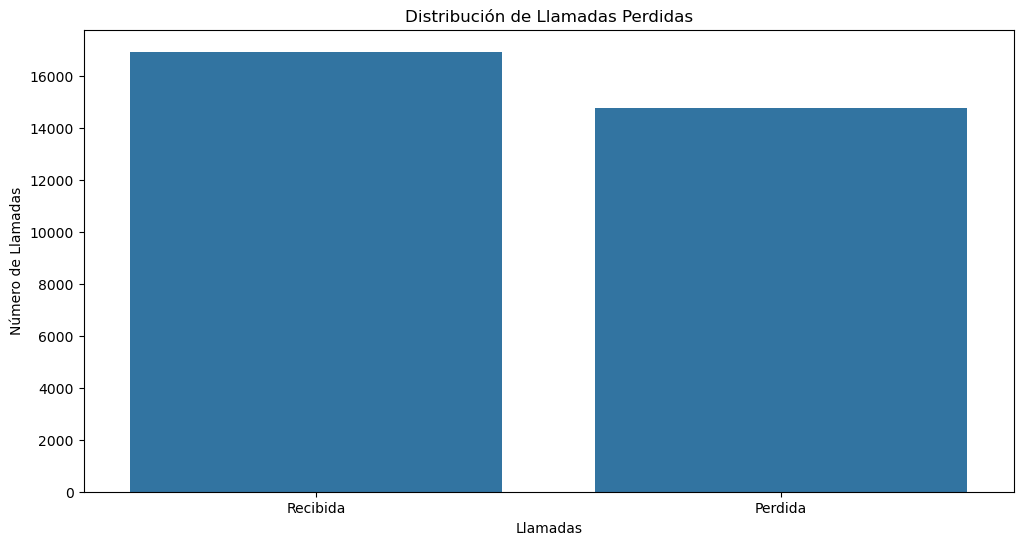

El numero de llamadas contestadas es: 16943
El numero de llamadas perdidas es: 14774
La diferencia de llamadas es: -2169
El porcentaje de llamadas contestadas es:53.42%
El porcentaje de llamadas perdidas es:46.58%


In [38]:
# Creamos un grafico de barras para analizar la distribucion 
plt.figure(figsize=(12, 6))
sns.countplot(data=calls[calls['direction']=='out'], x='is_missed_call')
plt.xticks([0, 1], ['Recibida', 'Perdida'])
plt.title('Distribución de Llamadas Perdidas')
plt.xlabel('Llamadas')
plt.ylabel('Número de Llamadas')
plt.show()

# Calculamos el numero y porcentaje de llamadas internas y externas 
print('El numero de llamadas contestadas es:',(calls[calls['direction']=='out']['is_missed_call']==False).sum())
print('El numero de llamadas perdidas es:',(calls[calls['direction']=='out']['is_missed_call']==True).sum())
print('La diferencia de llamadas es:', (calls[calls['direction']=='out']['is_missed_call']==True).sum()-(calls[calls['direction']=='out']['is_missed_call']==False).sum())
print('El porcentaje de llamadas contestadas es:{:.2f}%'.format((100*(calls[calls['direction']=='out']['is_missed_call']==False).sum()/len(calls[calls['direction']=='out']))))
print('El porcentaje de llamadas perdidas es:{:.2f}%'.format((100*(calls[calls['direction']=='out']['is_missed_call']==True).sum()/len(calls[calls['direction']=='out']))))


### Observacion 
El porcentaje de llamadas respondidas es un 5% mayor cuando solo se evalua las si el cliente obtuvo respuesta o no que si evaluamos el numero de llamadas totales. Probablemente los usuarios al no resivir respuesta volvian a marcar.
Encuanto al numero de llamadas perdidas en ambos casos ronda el 35% .

## Calls_count

In [39]:
# Calculamos el total de llamadas
print('El total de llamadas es:',calls['calls_count'].sum())

# Imprimimos la informacion de la columna 
calls['calls_count'].describe()



El total de llamadas es: 772974


count    45670.000000
mean        16.925203
std         59.081220
min          1.000000
25%          1.000000
50%          4.000000
75%         14.000000
max       4817.000000
Name: calls_count, dtype: float64

In [40]:
# Imprimimos so suarios que hicieron mas de 14 llamadas 
(calls[calls['calls_count']>=14]).sort_values(by='calls_count',ascending=False)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
40733,167827,2019-11-11,out,False,929428,True,4817,0,5529
40671,167827,2019-10-31,out,False,929428,True,2614,0,45312
40690,167827,2019-11-05,out,False,929428,True,1533,0,27889
40680,167827,2019-11-01,out,False,929428,True,1529,0,28017
6984,166582,2019-10-01,out,False,885876,False,1480,86910,113843
...,...,...,...,...,...,...,...,...,...
17096,166916,2019-11-18,in,False,906406,False,14,1666,2035
9543,166658,2019-11-07,out,False,890412,False,14,1082,1213
48052,168187,2019-11-01,out,False,937736,True,14,0,318
25391,167125,2019-10-10,out,False,902782,True,14,0,438


### Observaciones
Podemos mirar en el numero de llamadas realizadas, que en el percentil 75% se encuentran 14 llamadas mientras que el numero maximo es 4817, siendo llamadas realizadas por el operador, las cuales no se respóndio, patron que encontramos en la mayoria de usuarios con un gran cumulo de llamadas  lo cual nos puede sugerir algun tipo de sesgo, que nos generes este comulo que nos provoca desviaciones importantes como el calculo de la media en la cual nos arroja una media de casi 17 llamadas, siendo que en el percentil 75% el numero de llamadas es 14.\
Ahi operadores que realizaron un gran numero de llamadas en poco tiempo, esto nos puede señalar un bloqueo de llamada por parte del cliente o que el operador llamaba y colgaba para inflar las estadisticas. 

## Call_duration 

In [41]:
# Filtramos las llamadas respondidas 
calls_answered = calls[calls['is_missed_call']==False]
missed_calls = calls[calls['is_missed_call']==True]

# Imprimimos la informacion de la columna 
print('Lamadas atendidas')
print(calls_answered['call_duration'].describe())


Lamadas atendidas
count     30153.000000
mean       1530.326502
std        4862.861971
min           0.000000
25%         110.000000
50%         446.000000
75%        1425.000000
max      144395.000000
Name: call_duration, dtype: float64


## Observaciones 
En el analisis inicial de datos inicial no calculamos los maximos y minimos en las columnas referentes al tiempo y podemos observar que el tiempo promedio son 1102 y el maximo percentil 16339, con lo cual podemos deducir que se tratan de segundos por lo que haremos la convercion a minutos dividiendo entre 60 todas las columnas de tiempo para tener una mejor comprencion 

C:\Users\jesus\AppData\Local\Temp\ipykernel_5668\1350676397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_answered['call_duration']=(calls_answered['call_duration']/60).round(2)
C:\Users\jesus\AppData\Local\Temp\ipykernel_5668\1350676397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_answered['total_call_duration']=(calls_answered['total_call_duration']/60).round(2)
C:\Users\jesus\AppData\Local\Temp\ipykernel_5668\1350676397.py:6: SettingWithCopyWarning: 
A value is trying to be set o

count    30153.000000
mean        25.505447
std         81.047705
min          0.000000
25%          1.830000
50%          7.430000
75%         23.750000
max       2406.580000
Name: call_duration, dtype: float64

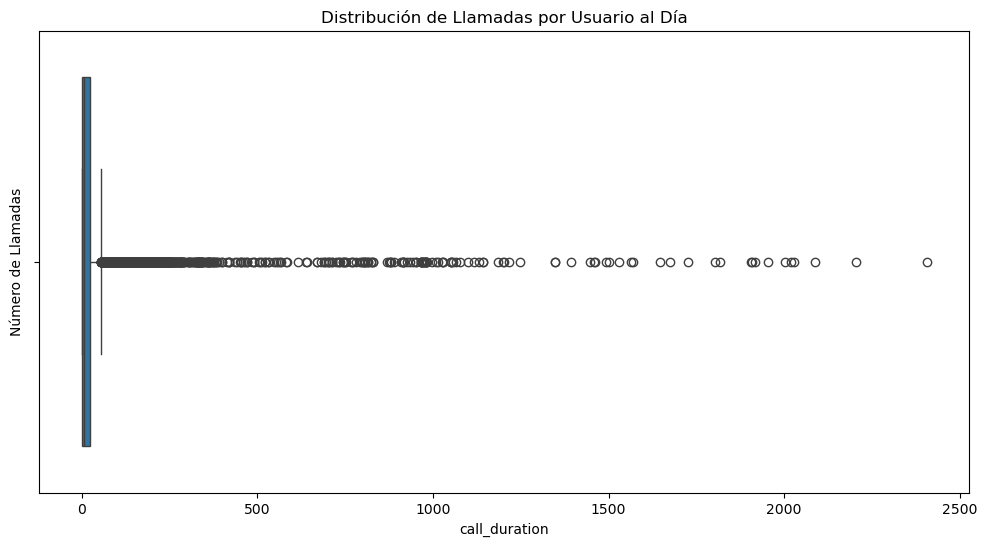

In [42]:
# Convertimos a minutos dividiendo los segundos entre 60 y redondeando
calls['call_duration']=(calls['call_duration']/60).round(2)
calls['total_call_duration']=(calls['total_call_duration']/60).round(2)
calls_answered['call_duration']=(calls_answered['call_duration']/60).round(2)
calls_answered['total_call_duration']=(calls_answered['total_call_duration']/60).round(2)
missed_calls['call_duration']=(missed_calls['call_duration']/60).round(2)
missed_calls['total_call_duration']=(missed_calls['total_call_duration']/60).round(2)

# Imprimimos la informacion de la columna 
display(calls_answered['call_duration'].describe())

# Creamos un histograma para analizar la distribucion 
plt.figure(figsize=(12, 6))
sns.boxplot(data=calls_answered, x='call_duration')
plt.title('Distribución de Llamadas por Usuario al Día')
plt.ylabel('Número de Llamadas')
plt.show()

In [43]:
# Calculamos las horas de la llamada mas larga 
print('La llamada mas larga en horas, duro:{:.2f}'.format((calls['call_duration']/60).max()))

La llamada mas larga en horas, duro:40.11


In [44]:
# Imprimimos llamada mas larga
calls[calls['call_duration']==2406.58]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
6946,166582,2019-09-25,out,False,885876,False,1230,2406.58,2769.25


### Obsevaciones 
Una llamada de 40 horas no es posible pero al igual que con el numero de llamadas por usuario el percentil 75 es menor que la media, a causa de valores atipicos que impactan estadisticamente.\
**Medidas** - Calcularemos los Outliers y los eliminaremos ya que no podemos tener llamadas que duren mas de un día ni muy extensas.

In [45]:
# Calculamos outliers
Q1 = calls['call_duration'].quantile(0.25)
Q3 = calls['call_duration'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
calls= calls[calls['call_duration'] <= limite_superior]
calls_answered= calls_answered[calls_answered['call_duration'] <= limite_superior]
missed_calls= missed_calls[missed_calls['call_duration'] <= limite_superior]

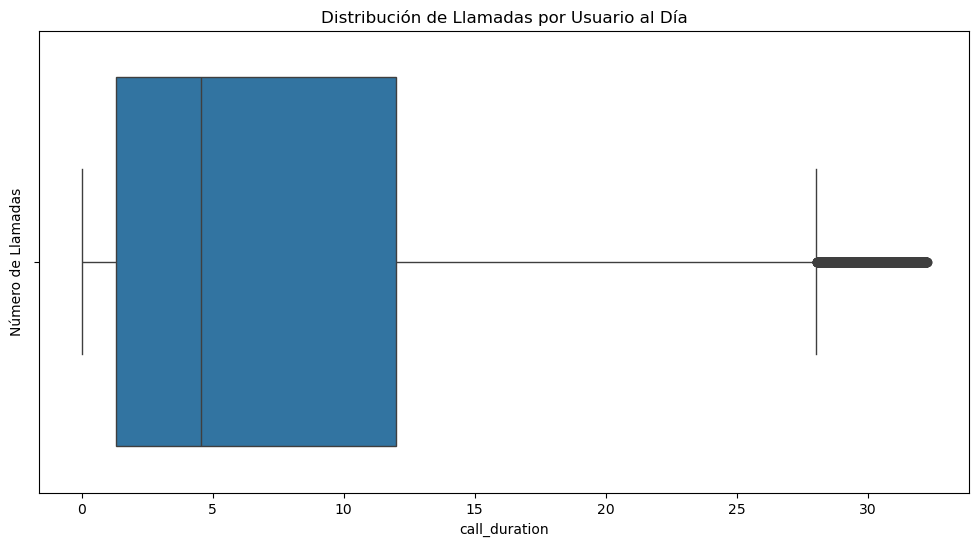

np.float64(32.25)

In [46]:
# Creamos un histograma para analizar la distribucion 
plt.figure(figsize=(12, 6))
sns.boxplot(data=calls_answered, x='call_duration')
plt.title('Distribución de Llamadas por Usuario al Día')
plt.ylabel('Número de Llamadas')
plt.show()
limite_superior

## Total_call_duration

In [47]:
# Imprimimos la informacion de la columna 
calls_answered['total_call_duration'].describe()


count    24355.000000
mean         9.189189
std          9.611820
min          0.000000
25%          1.730000
50%          5.370000
75%         13.820000
max         66.580000
Name: total_call_duration, dtype: float64

### Observacion
La distibucion del tiempo total por llamada son congrentes despues de la eliminacion de outliers

## KPI - Tiempo Promedio de Operacion 
Para calcular el tiempo de Operacion contamos con la columna 'call_duration' la cual contiene el tiempo de duracion de la llamada solamente por lo cual agruparemos por operador, y promediaremos la duracion.
Para esto primero agruparemos por operador sumaremos el tiempo de duracion y dividiremos entre la suma del numero de llamadas que se encuentran en la columna llamada 'calls_count'(solo tomaremos en cuenta el numero de llamadas respondidas)

### Exploracion de datos 

In [48]:
# Agrupamos por operador, sumaremos el taotal de la duracion de llamada y el total de llamadas por operador 
aht = calls_answered.groupby('operator_id', as_index=False).agg({'call_duration':'sum', 'calls_count':'sum'})

# Calculamos la duracion promedio 
aht ['calls_duration_avg']= (aht['call_duration']/aht['calls_count']).round(2)

# Imprimimos una muestra 
display(aht.head())

# Descrivimos la columna del promedio 
print('Informacion sobre la duracion promedio de llamada')
aht['calls_duration_avg'].describe().round(2)

,operator_id,call_duration,calls_count,calls_duration_avg
0,879896,388.63,277,1.40
1,879898,477.85,607,0.79
2,880020,38.17,24,1.59
3,880022,224.67,95,2.36
4,880026,914.24,602,1.52


Informacion sobre la duracion promedio de llamada


count    1019.00
mean        1.54
std         1.54
min         0.01
25%         0.79
50%         1.31
75%         1.91
max        27.80
Name: calls_duration_avg, dtype: float64

### Observacion 
Podemos ver una media de 1.54 minutos. y un maximo de 27.80, pero para definir el eficiencia en cuestiones de duracion nos basaremos en fuentes externas las cuales nos mencionan: "En el sector de servicios de comunicaciones, un tiempo de operación de 300 a 360 segundos se considera el 'punto óptimo' donde la eficiencia operativa se cruza con la resolución efectiva de problemas técnicos" (Gartner, 2022). En este punto podemos deducir que mas del 75% de los operadores se encuentran dentro de este parametro, cumpliendo menos de 6 minutos por llamada, esto ya que en las llamadas se pueden tratar temas mas complejos que requieran de mas tiempo de atencion. Por otra parte una llamada demaciada corta puede indicar problemas como que el cliente cuelge la llamada por inconformidad, que el operador cuelge la llamada sin dar el servicio adecuado, problemas en la captura de la informacion, una broma telefonica o solamente una consulta simple.  **Definiremos como llamadas menores de 2 minutos como eficientes, 6 minutos normal y mas de 6 minutos como deficiente**.

In [49]:
# Creamos una funcion para etiquetar 
def clasificar_aht(duracion_promedio):
    if duracion_promedio <= 2:
        return "Eficiente"
    elif duracion_promedio <= 6:
        return "Normal"
    else:
        return "Deficiente"

# Aplicamos la funcion a la columna 
aht['clasificacion_aht'] = aht['calls_duration_avg'].apply(clasificar_aht)

# Verificar los resultados
print("Distribución de clasificaciones AHT:")
print(aht['clasificacion_aht'].value_counts())
print()
print("Porcentajes:")
print((aht['clasificacion_aht'].value_counts(normalize=True) * 100).round(2))

Distribución de clasificaciones AHT:
clasificacion_aht
Eficiente     795
Normal        211
Deficiente     13
Name: count, dtype: int64

Porcentajes:
clasificacion_aht
Eficiente     78.02
Normal        20.71
Deficiente     1.28
Name: proportion, dtype: float64


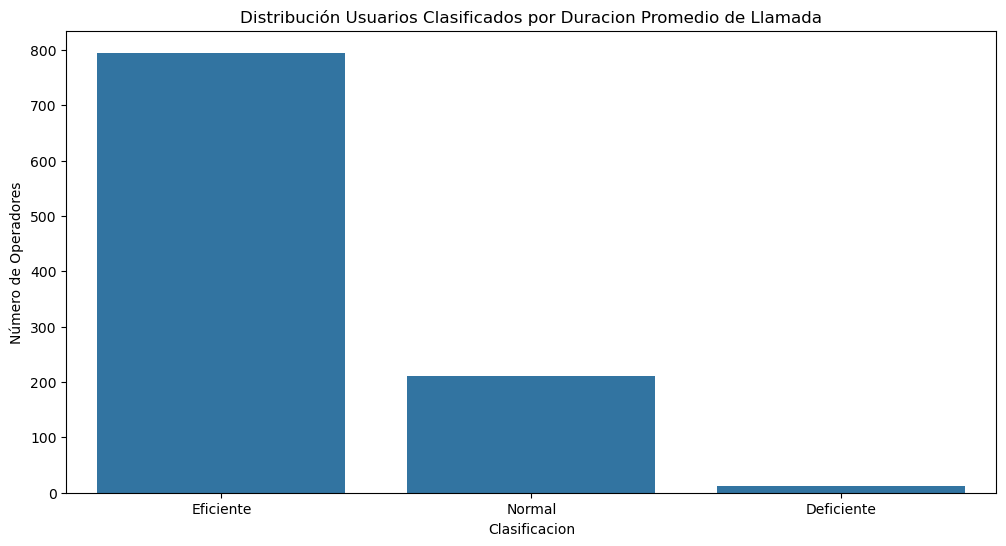

In [50]:
# Graficamos la distribucion de las clasificaciones 
plt.figure(figsize=(12, 6))
sns.countplot(data=aht, x='clasificacion_aht')
plt.title('Distribución Usuarios Clasificados por Duracion Promedio de Llamada')
plt.xlabel('Clasificacion')
plt.ylabel('Número de Operadores')
plt.show()



### Analisis 
Mas del 98% de los operadores cumplen con el tiempo maximo normal y el 78% coun un tiempo eficiente, pero no podemos definir la eficiencia de un operador por el tiempo promedio de sus llamadas ya que puede tener una duracion promedio baja pero, pude que no resolviera el problema del cliente provocando que este llame nuevamente. Esto hace nesesario tomar en cuenta otros indicadores para determinar la eficiencia.

## Tiempo medio de respuesta 
Un tiempo de respuesta rapido es esencial para una experiencia satisfactoria, aunque esto puede no estar totalmente bajo el control de los operadores ya que este puede recibir llamadas simultaneas en horas pico.
Para calcular el tiempo promedio de resupesta crearemos una columna de tiempo de respuesta restando la columna call_duration a total_call_duration, despues agruparemos por operador y promediaremos el tiempo de respuesta para despues multiplicarlo por 60 para obtener los resultados en segundos  

In [51]:
# Calculamos el tiempo de respuesta restando la duracion de llamada a duracion total 
calls['response_time']= calls['total_call_duration']-calls['call_duration']
calls_answered['response_time']= calls_answered['total_call_duration']-calls['call_duration']
missed_calls['response_time']= missed_calls['total_call_duration']-calls['call_duration']
# Agrupamos por operador y promediamos el tiempo de respuesta 
asa= calls_answered[calls_answered['direction']=='in'].groupby('operator_id', as_index=False)['response_time'].mean()
asa['response_time'].describe()*60

count    45060.000000
mean        47.535024
std         58.487718
min          1.000000
25%         17.400000
50%         30.850000
75%         56.074839
max        632.100000
Name: response_time, dtype: float64

### Observacion 
El promedio de respuesta es 47 segundos, para establecer un punto optimo utilizaremos metricas establecida en el ambito de las telecomunicaciones la cual nos dice: "Mantener un ASA bajo es el factor determinante para reducir la Tasa de Abandono; en telecomunicaciones, un ASA que supera los 30 segundos correlaciona directamente con una caída del 15% en la satisfacción del cliente" (CSIA, 2024).**Fijaremos con 30 segundos como punto optimo, 47 segundos normal y mayor a 47 ineficiente**. 

In [52]:
# Creamos funcion para etiquetar
def clasificar_asa (respuesta_promedio):
    if respuesta_promedio <= .5:
        return "Eficiente"
    elif respuesta_promedio <= .78:
        return "Normal"
    else:
        return "Deficiente"

# Aplicamos la funcion a la columna 
asa['clasificacion_asa'] = asa['response_time'].apply(clasificar_asa)

# Verificar los resultados
print("Distribución de clasificaciones SAS:")
print(asa['clasificacion_asa'].value_counts())
print()
print("Porcentajes:")
print((asa['clasificacion_asa'].value_counts(normalize=True) * 100).round(2))

Distribución de clasificaciones SAS:
clasificacion_asa
Eficiente     370
Deficiente    232
Normal        149
Name: count, dtype: int64

Porcentajes:
clasificacion_asa
Eficiente     49.27
Deficiente    30.89
Normal        19.84
Name: proportion, dtype: float64


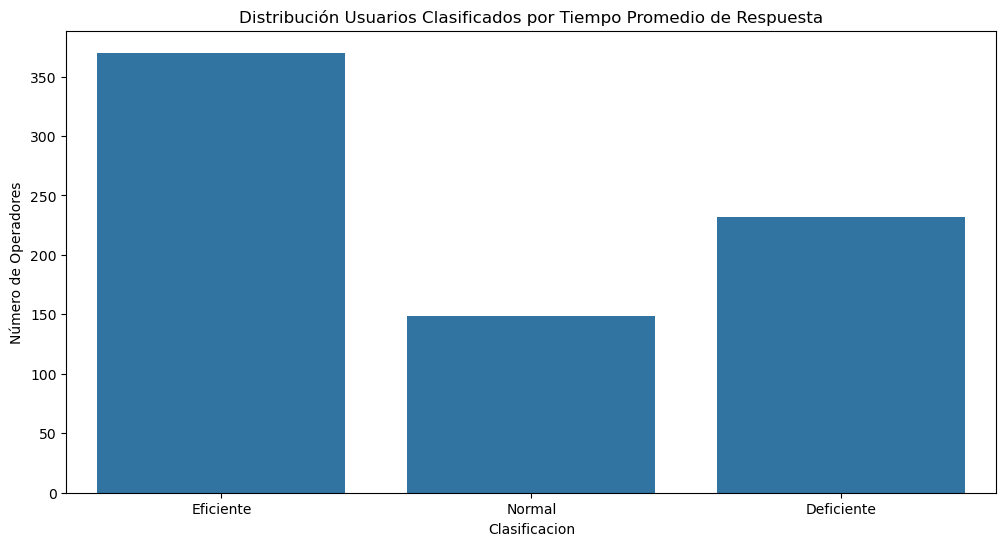

In [53]:
# Graficamos la distribucion de las clasificaciones 
plt.figure(figsize=(12, 6))
sns.countplot(data=asa, x='clasificacion_asa')
plt.title('Distribución Usuarios Clasificados por Tiempo Promedio de Respuesta')
plt.xlabel('Clasificacion')
plt.ylabel('Número de Operadores')
plt.show()


## Analisis 
Solo el 49% de los operadores cumple con un tiempo de respuesta eficiente, 19% en un nivel normal, sumando casi 70% de operadores en niveles optimos. El tiempo de respuesta se puede ver afectado por factores como la saturacion del opreador por fallos en el sistema, congestion en las lineas, o por durar demasiado tiempo en otras llamadas, factor poco probable, ya que el 78% de los operadores tienen una duracion optima. Existen varios factores externos que podrian afectar el tiempo de respuesta del operador por lo que se consideraran otros factores para determinar la eficiencia de un operador.

## Solucion a la Primera Llamada
Un operador capas de resolver la inquietud del cliente a la primera llamada puede identificarse como un trabajador eficiente, sin embargo que un cliente solo haga una llamada no solo puede indicar que el operador resolvio su duda, sino tambien se puede tratar de un cliente que decidio desertar, de igual forma si el operador tarda mucho tiempo en apoyar al cliente, la satosfaccion de este se vera disminuida asi como tambien otros clientes que puedan estar esperando por respuesta. De tal forma que no podemos dejar la seleccion solo a este indicador.\
Para esta metrica analizaremos calls_count que contiene el numero de llamadas.

In [54]:
# Agruparemos por operador y promediaremos el numero de llamadas que recibio cada uno 
fcr= calls_answered.groupby('operator_id').agg({'calls_count':'mean'}).sort_values(by='calls_count')
display(fcr.head())

# Describimos la columna 
fcr['calls_count'].describe()

,calls_count
operator_id,
905840,1.0
905478,1.0
955086,1.0
942214,1.0
904344,1.0


count    1019.000000
mean        5.129927
std         6.673758
min         1.000000
25%         1.500000
50%         2.659091
75%         6.000000
max        69.238095
Name: calls_count, dtype: float64

### Observaciones 
Hay muy pocos operadores que resolvieron en la primera consulta y se pueden tratar de operadores que pudieron contestar un numero muy limitado de llamadas por lo que al estar tratando con un promedio, **podemos dejar como un promedio eficiente  menos de 2 llamadas, aceptable menos de 4 llamadas y deficiente 4 o mas** por lo que mas del 50% de los operadores cumplen esta condicion 

In [55]:
# Creamos funcion para etiquetar
def clasificar_fcr (llamadas_promedio):
    if llamadas_promedio < 2 :
        return "Eficiente"
    elif llamadas_promedio < 4:
        return "Normal"
    else:
        return "Deficiente"

# Aplicamos la funcion a la columna 
fcr['clasificacion_fcr'] =fcr['calls_count'].apply(clasificar_fcr)

# Verificar los resultados
print("Distribución de clasificaciones fcr:")
print(fcr['clasificacion_fcr'].value_counts())
print()
print("Porcentajes:")
print((fcr['clasificacion_fcr'].value_counts(normalize=True) * 100).round(2))

Distribución de clasificaciones fcr:
clasificacion_fcr
Deficiente    383
Eficiente     368
Normal        268
Name: count, dtype: int64

Porcentajes:
clasificacion_fcr
Deficiente    37.59
Eficiente     36.11
Normal        26.30
Name: proportion, dtype: float64


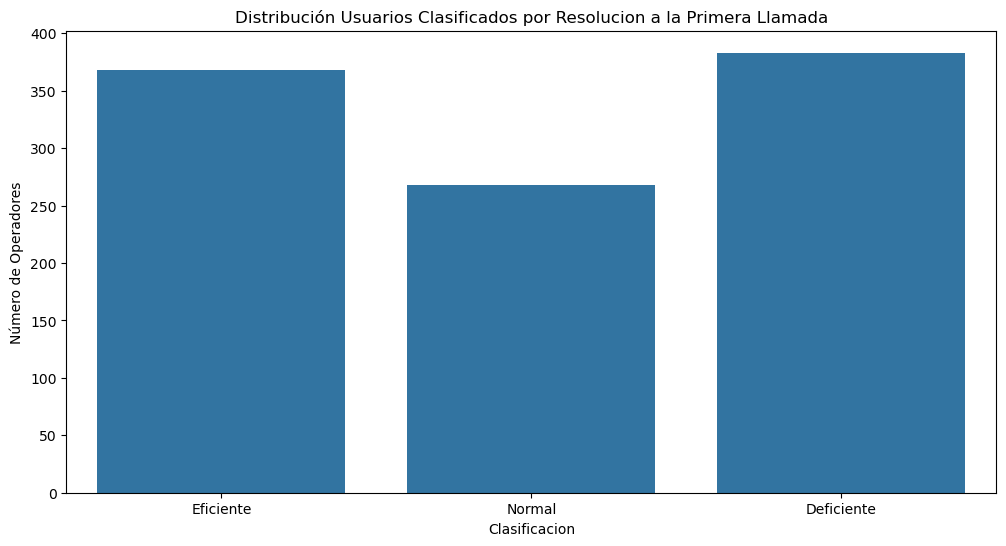

In [56]:
# Graficamos la distribucion de las clasificaciones 
plt.figure(figsize=(12, 6))
sns.countplot(data=fcr, x='clasificacion_fcr')
plt.title('Distribución Usuarios Clasificados por Resolucion a la Primera Llamada')
plt.xlabel('Clasificacion')
plt.ylabel('Número de Operadores')
plt.show()

### Analisis 
El 62% de los operadores cuentan con metricas aceptables de los cuales el 36% son eficientes.\
Dentro de los indicadores de eficiencia no consideran esta KPI, pero consideramos mostrala como referencia. 

## Llamadas Realizadas por Hora
Para este indicador contamos con la columna 'drirection' la cual nos indica cuales llamadas entraron y cuales saliero por lo que agruparemos por operador y promediaremos el numero de llamadas que salieron 

In [57]:
# Guardamos las llamadas que realizaron los operadores 
och= calls[calls['direction']=='out']

# Agrupamos por dia, operador y promediamos el numero de llamadas 
och= och.groupby(['date','operator_id'], as_index=False).agg({'calls_count':'sum'})

# Describimos la columna
display(och.head())
print()
print('Descripcion')
och['calls_count'].describe()

,date,operator_id,calls_count
0,2019-08-02,879896,13
1,2019-08-02,879898,5
2,2019-08-02,880240,1
3,2019-08-03,879896,10
4,2019-08-03,879898,16



Descripcion


count    15008.000000
mean        25.854411
std         80.869164
min          1.000000
25%          3.000000
50%          9.000000
75%         25.000000
max       4817.000000
Name: calls_count, dtype: float64

### Observaciones 
Para fijar un punto optimo buscando en fuentes externas encontramos que: "Si es marcado manual, entre 80 y 120 intentos. Si es con marcador automático (Power Dialer), pueden superar los 200 intentos, aunque los contactos efectivos sean menores". Si nos basamos en estas metricas pocos operadores cumplirian. Esto se puede deber al nivel de complegidad que se atienda a cada llamada pero, este factor ya lo consideramos y mas del 77% de los operadores duran menos de 6 minutos en llamadad con un tiempo de espera promedio de 47 segundos por lo que un operador podria realizar de 7 a 8 llamadas por hora o 49 por dia, considerando que los operadores tambien reciben llamadas en un 14%, el numero de llamadas factibles por dia es 42, pero nosotros **Fijaremos mas de 25 llamadas como eficiente,mas de 9 normal, menos de 9 deficiente y mas de 120 como un dato anomalo**.

In [58]:
# Creamos funcion para etiquetar och
def clasificar_och(llamadas_dia):
    if llamadas_dia < 9:
        return "Deficiente"
    elif llamadas_dia <= 25:
        return "Normal"
    elif llamadas_dia <= 120:
        return "Eficiente"
    else:
        return "Anomalo" 

# Aplicamos las etiquetas a la columna
och['clasificacion_och'] = och['calls_count'].apply(clasificar_och)

# Verificar los resultados
print("Distribución de clasificaciones OCH:")
print(och['clasificacion_och'].value_counts())
print()
print("Porcentajes:")
print((och['clasificacion_och'].value_counts(normalize=True) * 100).round(2))

Distribución de clasificaciones OCH:
clasificacion_och
Deficiente    7260
Normal        4019
Eficiente     3301
Anomalo        428
Name: count, dtype: int64

Porcentajes:
clasificacion_och
Deficiente    48.37
Normal        26.78
Eficiente     21.99
Anomalo        2.85
Name: proportion, dtype: float64


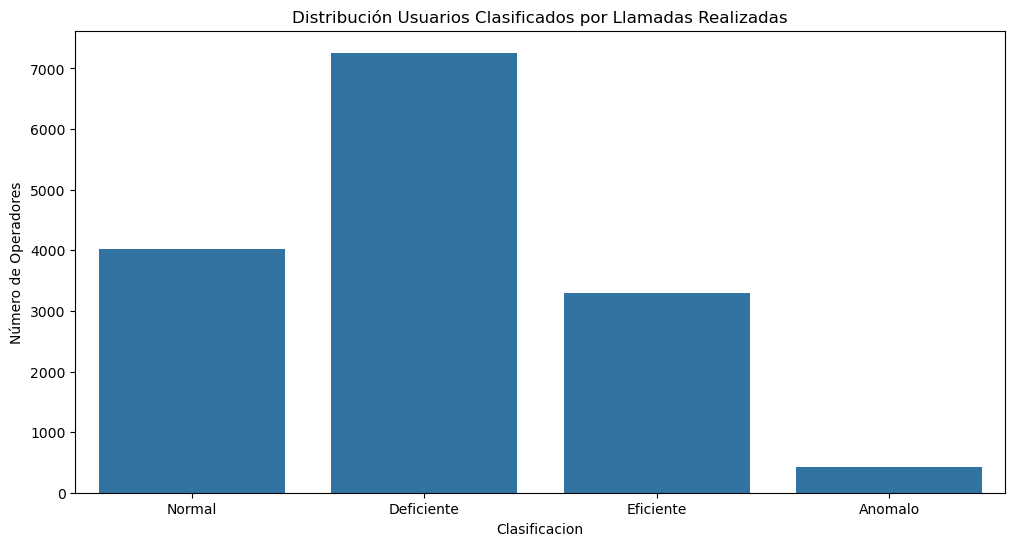

In [59]:
# Graficamos la distribucion de las clasificaciones 
plt.figure(figsize=(12, 6))
sns.countplot(data=och, x='clasificacion_och')
plt.title('Distribución Usuarios Clasificados por Llamadas Realizadas')
plt.xlabel('Clasificacion')
plt.ylabel('Número de Operadores')
plt.show()


## Analisis
Este indicador ha sido en el que menos operadores han logrado un metrica aceptable ya que un 48% solo cuentan con llamadas optimas 

## Llamadas No Atendidas por el Agente (Agente no Answer)
Para este indicador filtraremos las llamadas entrantes que timbraron mas de 10 segundos basandonos en la columna 'direction' y 'response_time'.

In [60]:
# Guardamos las llamadas entrantes que no fueron respondidas
ana = calls[calls['direction']=='in']

# Guardamos las llamadas entrantes que no fueron respondidas que timbraron menos de 10 segundos 
ana = ana[ana['response_time']>.16]

# Agrupamos por operador y promediamos el numero de llamadas no atendidas
ana= ana.groupby('operator_id',as_index=False).agg({'is_missed_call':'sum'})

# Describimos la columna
ana['is_missed_call'].describe()

count    700.000000
mean       0.701429
std        2.053852
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       24.000000
Name: is_missed_call, dtype: float64

### Observacion  
La mayoria de los operadores no tienen llamas perdidas lo que es eficiente. **Definiremos como eficiente aquellos que no tengan llamadas perdidas, 1 llamada perdida como normal y mas de 1 como deficiente**

In [61]:
# Creamos funcion para etiquetar
def clasificar_ana (llamadas_perdidas_promedio):
    if llamadas_perdidas_promedio < 1 :
        return "Eficiente"
    elif llamadas_perdidas_promedio < 2:
        return "Normal"
    else:
        return "Deficiente"

# Aplicamos la funcion a la columna 
ana['clasificacion_ana'] =ana['is_missed_call'].apply(clasificar_ana)

# Verificar los resultados
print("Distribución de clasificaciones ana:")
print(ana['clasificacion_ana'].value_counts())
print()
print("Porcentajes:")
print((ana['clasificacion_ana'].value_counts(normalize=True) * 100).round(2))

Distribución de clasificaciones ana:
clasificacion_ana
Eficiente     510
Normal         97
Deficiente     93
Name: count, dtype: int64

Porcentajes:
clasificacion_ana
Eficiente     72.86
Normal        13.86
Deficiente    13.29
Name: proportion, dtype: float64


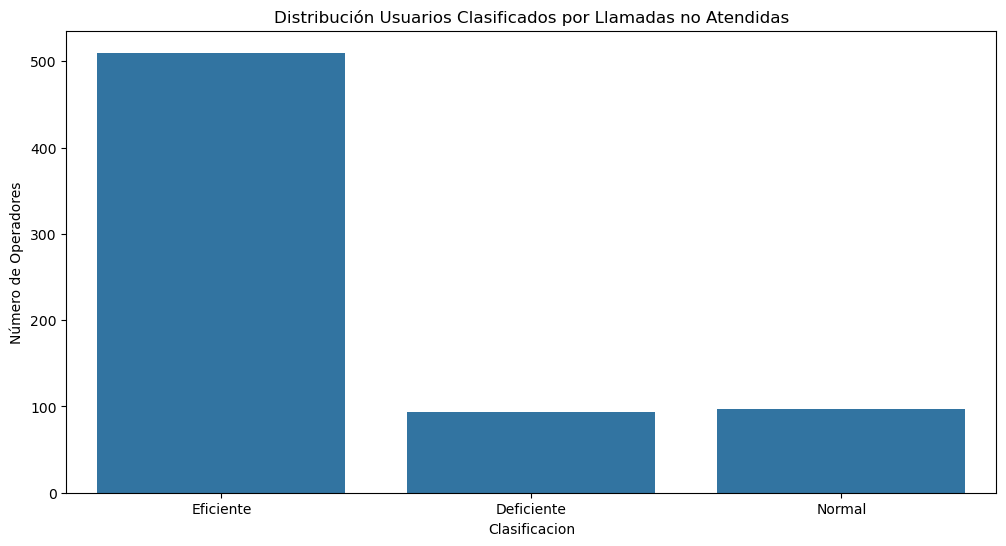

In [62]:
# Graficamos la distribucion de las clasificaciones 
plt.figure(figsize=(12, 6))
sns.countplot(data=ana, x='clasificacion_ana')
plt.title('Distribución Usuarios Clasificados por Llamadas no Atendidas')
plt.xlabel('Clasificacion')
plt.ylabel('Número de Operadores')
plt.show()



### Analisis 
El 72% posee una metrica eficiente, y el 13% una metrica normal, dandonos un margen de 86% de operadores con llamadas perdidas aceptables 

## Prueba Estadistica de Desempeño Entre Indicadores

**Formulacion de Hipotesis**
- H0: No hay diferiencia entre las clasificaciones
- H1: Hay diferiencia entre 2 o mas categorias


In [63]:
# Creamos un funcion 
def prueba_estadistica (kpi,clasificacion,columna):
# Agrupamaos los niveles de eficiencia 
    grupos = [
    kpi[kpi[clasificacion] == 'Eficiente'][columna],
    kpi[kpi[clasificacion] == 'Normal'][columna],
    kpi[kpi[clasificacion] == 'Deficiente'][columna]
]

    f_stat, p_value = f_oneway(*grupos)
    print(f"Estadístico F: {f_stat:.4f}")
    print(f"Valor p: {p_value:.4f}")
                           
# Preparar datos para Tukey HSD
    eficientes = kpi[kpi[clasificacion] == 'Eficiente'][columna]
    normales = kpi[kpi[clasificacion] == 'Normal'][columna]
    deficientes = kpi[kpi[clasificacion] == 'Deficiente'][columna]

# Prueba de Tukey
    tukey_result = tukey_hsd(eficientes, normales, deficientes)
    print(tukey_result)

### Tiempo Promedio de Operacion AHT

In [64]:
prueba_estadistica(aht,'clasificacion_aht','calls_duration_avg')

Estadístico F: 853.0993
Valor p: 0.0000
Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.719     0.000    -1.890    -1.547
 (0 - 2)     -9.312     0.000    -9.931    -8.692
 (1 - 0)      1.719     0.000     1.547     1.890
 (1 - 2)     -7.593     0.000    -8.226    -6.960
 (2 - 0)      9.312     0.000     8.692     9.931
 (2 - 1)      7.593     0.000     6.960     8.226



### Analisis Estadistico
Estadisticamente las diferiencias entre clasificaciones es significativa y confiable ya que el p-valor es menor a .0001. Tomando en cuenta el nivel de diferiencias otorgado por el metodo Tukey la brecha mas significativa es entre los operadores eficientes y deficientes, y la brecha menos amplia es entre los operadores deficientes y normales. **Rechazamos H0 ya que el P-valor es menor a .0001 y una diferiencia significativa de 856**

## Tiempo Promedio de Respuesta ASA

In [65]:

# Aplicamos la funcion 
prueba_estadistica(asa,'clasificacion_asa','response_time')


Estadístico F: 260.2873
Valor p: 0.0000
Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.346     0.000    -0.516    -0.175
 (0 - 2)     -1.420     0.000    -1.568    -1.273
 (1 - 0)      0.346     0.000     0.175     0.516
 (1 - 2)     -1.075     0.000    -1.259    -0.890
 (2 - 0)      1.420     0.000     1.273     1.568
 (2 - 1)      1.075     0.000     0.890     1.259



### Analisis Estadistico
La variacion mayor es entre los operadores eficientes y deficientes cun una diferiencia de 1.40 minutos, seguido por eficiente a normal con 1.07 minutos y por ultimo  normal a deficiente con una diferiencia de .34 minutos o 20 segundos lo cual podria parecer una gran diferiencia por la naturaleza de los datos, pero **la diferiencia es clara, y tenemos un p-valor de menor de .0001 por lo que rechazamos H0** .

## Resolucion a la Primera Llamada FCR

In [66]:
# Aplicamos la funcion 
prueba_estadistica(fcr,'clasificacion_fcr','calls_count')


Estadístico F: 330.8409
Valor p: 0.0000
Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.393     0.003    -2.373    -0.413
 (0 - 2)     -9.163     0.000   -10.054    -8.272
 (1 - 0)      1.393     0.003     0.413     2.373
 (1 - 2)     -7.770     0.000    -8.742    -6.798
 (2 - 0)      9.163     0.000     8.272    10.054
 (2 - 1)      7.770     0.000     6.798     8.742



## Analisis Estadistico
Naturalmente la diferiencia mayor es ente los operadores eficientes y deficientes con 9 llamadas de diferiencia mientras que la diferiencia de deficiente a normal es 1 llamada lo que nos indica que las metricas de los operadores ineficientes no se encuentran tan mal ya que en su mayoria les basta con responder una llamada para considerarse normal. encuanto a hipotesis **rechazamos H0 ya que la diferiencia es significativa y un p-valor cercano a 0**.

## Llamadas Realizadas por Hora OCH

In [67]:
# Aplicamos la funcion conciderando los datos anomalos  
# Agrupamaos los niveles de eficiencia 
grupos_och = [
    och[och['clasificacion_och'] == 'Eficiente']['calls_count'],
    och[och['clasificacion_och'] == 'Normal']['calls_count'],
    och[och['clasificacion_och'] == 'Deficiente']['calls_count'],
    och[och['clasificacion_och'] == 'Anomalo']['calls_count']
]

f_stat, p_value = f_oneway(*grupos_och)
print(f"Estadístico F: {f_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
                           
# Preparar datos para Tukey HSD
eficientes = och[och['clasificacion_och'] == 'Eficiente']['calls_count']
normales = och[och['clasificacion_och'] == 'Normal']['calls_count']
deficientes = och[och['clasificacion_och'] == 'Deficiente']['calls_count']
Anomalo = och[och['clasificacion_och'] == 'Anomalo']['calls_count']

# Prueba de Tukey
tukey_result = tukey_hsd(eficientes, normales, deficientes, Anomalo)
print(tukey_result)

Estadístico F: 3656.4712
Valor p: 0.0000
Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     35.484     0.000    31.774    39.194
 (0 - 2)     47.324     0.000    44.008    50.639
 (0 - 3)   -262.294     0.000  -270.408  -254.180
 (1 - 0)    -35.484     0.000   -39.194   -31.774
 (1 - 2)     11.840     0.000     8.734    14.945
 (1 - 3)   -297.778     0.000  -305.809  -289.748
 (2 - 0)    -47.324     0.000   -50.639   -44.008
 (2 - 1)    -11.840     0.000   -14.945    -8.734
 (2 - 3)   -309.618     0.000  -317.474  -301.762
 (3 - 0)    262.294     0.000   254.180   270.408
 (3 - 1)    297.778     0.000   289.748   305.809
 (3 - 2)    309.618     0.000   301.762   317.474



## Analisis Estadistico 
En este analisis consideramos los datos anomalos para analizar que tanto impactan y podemos obserbar que la menor diferiencia es 262 en relacion a los operadores eficientes y la mayor diferiencia entre clasificaciones normales es de 47 llamadas de los trabajadores eficientes respecto a los deficientes.En cuestion al OCH **Negamos H0 ya que le p-valor es similar a 0 y su diferiencia es clara**. Respeco a este indicador parece ser el mas diferiencia hay ente los operadores.

## Llamadas No Atendidas por el Agente (Agent No Answer - ANA)

In [68]:
# Aplicamos la funcion 
prueba_estadistica(ana,'clasificacion_ana','is_missed_call')


Estadístico F: 324.5348
Valor p: 0.0000
Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.000     0.000    -1.385    -0.615
 (0 - 2)     -4.237     0.000    -4.629    -3.845
 (1 - 0)      1.000     0.000     0.615     1.385
 (1 - 2)     -3.237     0.000    -3.741    -2.732
 (2 - 0)      4.237     0.000     3.845     4.629
 (2 - 1)      3.237     0.000     2.732     3.741



### Analisis Estadistico 
**Existe una diferiencia significativa  de 324 por lo que tenemos que negar H0** contando con una diferiencia mas proporcional entre clasificaciones siendo la mas alta 4 llamadas no atendidas del operador Deficiente al operador Eficente y 1 llamada del normal al deficiente.

## Matriz General de Eficiencia 

In [69]:
# Preparamos los df
# Preparar cada DataFrame con solo operator_id y su clasificación
aht_class = aht[['operator_id', 'clasificacion_aht']].copy()
asa_class = asa[['operator_id', 'clasificacion_asa']].copy()
fcr_class = fcr.reset_index()[['operator_id', 'clasificacion_fcr']].copy()
ana_class = ana[['operator_id', 'clasificacion_ana']].copy()

# Agrupamos por operador para OCH por moda
och_class = och.groupby('operator_id')['clasificacion_och'].agg(lambda x: x.mode()[0]).reset_index()

# Unimos con merge
matriz_eficiencia = aht_class.merge(asa_class, on='operator_id', how='outer')
matriz_eficiencia = matriz_eficiencia.merge(fcr_class, on='operator_id', how='outer')
matriz_eficiencia = matriz_eficiencia.merge(ana_class, on='operator_id', how='outer')
matriz_eficiencia = matriz_eficiencia.merge(och_class, on='operator_id', how='outer')

# Verificar el resultado
print("Matriz combinada:")
print(f"Operadores totales: {len(matriz_eficiencia)}")
display(matriz_eficiencia.head())


Matriz combinada:
Operadores totales: 1090


,operator_id,clasificacion_aht,clasificacion_asa,clasificacion_fcr,clasificacion_ana,clasificacion_och
0,879896,Eficiente,Eficiente,Deficiente,Eficiente,Deficiente
1,879898,Eficiente,Eficiente,Deficiente,Eficiente,Eficiente
2,880020,Eficiente,Eficiente,Eficiente,Eficiente,Deficiente
3,880022,Normal,Eficiente,Normal,Eficiente,Deficiente
4,880026,Eficiente,Eficiente,Deficiente,Eficiente,Normal


In [70]:
# Comprobamos la matriz 
matriz_eficiencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   operator_id        1090 non-null   int64 
 1   clasificacion_aht  1019 non-null   object
 2   clasificacion_asa  751 non-null    object
 3   clasificacion_fcr  1019 non-null   object
 4   clasificacion_ana  700 non-null    object
 5   clasificacion_och  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 51.2+ KB


### Observacion 
Existen datos nulos en la matriz, esto debido a los diversos filtros utilizados para analizar los distintos indicadores, un ejemplo de esto es el tiempo promedio de llamada, ya que si promediabamos el total de los datos, las llamadas que no fueron respondidas impactaria al promedio ya que su tiempo es de 0 minutos.\
**Medidas** - Ponderaremos cada categoria con un punto y calcularemos o re-etiquetaremos con el promedio de los puntos. Esto dara una mayor ponderacion a los operadores que desempeñaron diversas actividades.
- Eficiente  3
- Normal     2
- Deficiente 0
luego se sumaran los puntos a la variante 'puntos totales' y se asignara un punto por a la variable 'puntos kpis.\
Se filtraran por 'puntos kpi':
- 0 puntos: sin datos
- -2 puntos datos insuficientes
A los operadores com mas de 2 'puntos kpi' se promediaran los 'puntos totales' entre los 'puntos kpi', se etiquetara por promedio:
- +2.5 puntos= Eficiente
- +2.0 puntos= Normal
- +1.5 puntos= Deficiente
- -1.5 puntos= Muy Deficiente 


In [71]:
# Creamos una funcion para puntuar entre columnas
def clasificacion_a_puntos(clasificacion):
    if pd.isna(clasificacion):
        return 0
    elif clasificacion == 'Eficiente':
        return 3
    elif clasificacion == 'Normal':
        return 2
    elif clasificacion == 'Deficiente':
        return 1
    else:
        return 0

# Puntuamos con funcion 
matriz_eficiencia['puntos_aht'] = matriz_eficiencia['clasificacion_aht'].apply(clasificacion_a_puntos)
matriz_eficiencia['puntos_asa'] = matriz_eficiencia['clasificacion_asa'].apply(clasificacion_a_puntos)
matriz_eficiencia['puntos_fcr'] = matriz_eficiencia['clasificacion_fcr'].apply(clasificacion_a_puntos)
matriz_eficiencia['puntos_ana'] = matriz_eficiencia['clasificacion_ana'].apply(clasificacion_a_puntos)
matriz_eficiencia['puntos_och'] = matriz_eficiencia['clasificacion_och'].apply(clasificacion_a_puntos)

# Creeamos funcion para contar puntos 
def clasificacion_flexible(row):
    kpis_disponibles = 0
    puntos_totales = 0
    
    for kpi in ['puntos_aht', 'puntos_asa', 'puntos_fcr', 'puntos_ana', 'puntos_och']:
        if not pd.isna(row[kpi]) and row[kpi] > 0:
            kpis_disponibles += 1
            puntos_totales += row[kpi]
    
    if kpis_disponibles == 0:
        return 'Sin Datos'
    elif kpis_disponibles < 2:  
        return 'Datos Insuficientes'
    
    # Calcular promedio de eficiencia
    promedio = puntos_totales / kpis_disponibles
    
    if promedio >= 2.5:
        return 'Eficiente'
    elif promedio >= 2.0:
        return 'Normal'
    elif promedio >= 1.5:
        return 'Deficiente'
    else:
        return 'Muy Deficiente'

clasificacion_general
Normal                 528
Eficiente              270
Deficiente             176
Datos Insuficientes     69
Muy Deficiente          45
Sin Datos                2
Name: count, dtype: int64

Normal: 48.44%
Eficiente: 24.77%
Deficiente: 16.15%
Datos Insuficientes: 6.33%
Muy Deficiente: 4.13%
Sin Datos: 0.18%


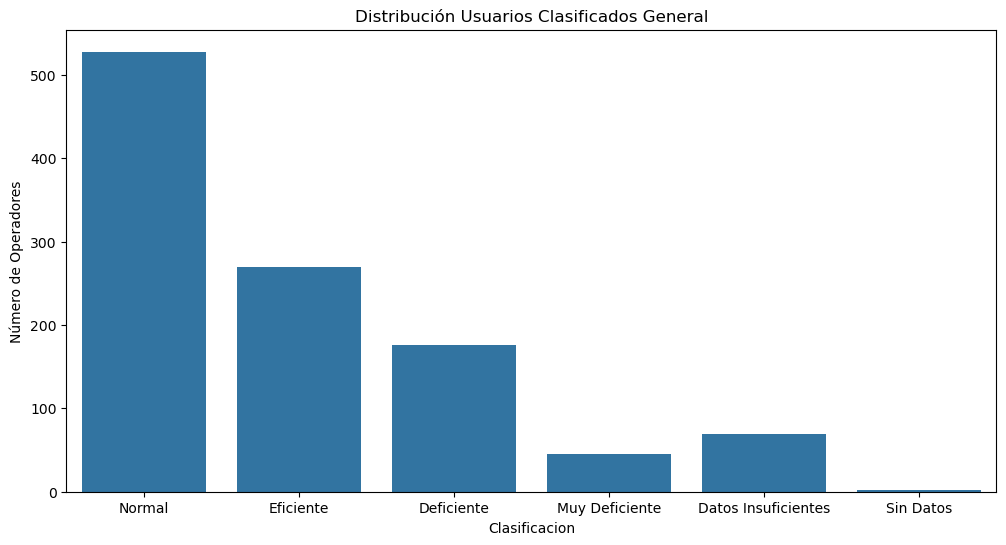

In [72]:
# Aplicamos funcion 
matriz_eficiencia['clasificacion_general'] = matriz_eficiencia.apply(clasificacion_flexible, axis=1)

# Comporbamos 
distribucion = matriz_eficiencia['clasificacion_general'].value_counts()
print(distribucion)
print()

# Calculamos porcentajes 
porcentajes = (distribucion / len(matriz_eficiencia) * 100).round(2)
for categoria, porcentaje in porcentajes.items():
    print(f"{categoria}: {porcentaje}%")

# Graficamos la distribucion de las clasificaciones generales
plt.figure(figsize=(12, 6))
sns.countplot(data=matriz_eficiencia, x='clasificacion_general')
plt.title('Distribución Usuarios Clasificados General')
plt.xlabel('Clasificacion')
plt.ylabel('Número de Operadores')
plt.show()


## Conclusion 
Despues de limpiar y dar formato a los datos, pudimos calcular los indicadores de eficiencia de los cuales determinamos que la mayor area de oportunidad que tiene la empresa en el indicador **Llamadas por Hora - OCH**, ya que representa el kpi con el porcentaje de datos aceptables mas bajos con un 26 % de operadores con metricas Normales y 21% Con metricas eficientes. Al contrario que **Tiempo Promedio de Operacion** con un 79% de eficiencia  y un 20% de operadores normales. Encuanto al resto de indicadores **Llamadas no Respondidas -ANA** ocupa el segundo lugar en el top de indicadores con mas eficiencia, con un porcentaje de 72% de operadores eficientes y 13% de operadores normales sumando un 86 % de operadores con una Taza de llamadas perdida aceptable, seguido por **Tiempo Promedio de respuesta - ASA** con colaboradores que responden eficientemente un 49% y normalmente 19%, y por ultimo **Resolucion a la primera llamada FCR** con 62% de operadores aceptables de los cuales solo el 36% actuan de manera Eficiente.
### Ponderacion general
Una ves ponderados los operadores con Indicadores individuales, se promediaron las puntuaciones y se re-etiqueto llegando al siguente resultado:
- Operadores Eficientes: 24.77%
- Operadores Normales: 48.44%
- Operadores Deficientes: 16.15%
- Operadores Muy Deficientes: 4.13%
- Datos insufucientes: 6.33%
- Sin datos: 0.18%.
  
Con los datos obtenidos del etiquetado general podemos concluir que:
- La empresa cuenta con un 73.21% de trabajadores con desempeño aceptable de los cuales el 24.77% son Eficases.
- Solo un 4.13% cuenta con metricas que requieren de mucho trabajo
- Hay margen de error del 6.51 % que no permitio evaluar a los trabajadores correctamente
### Recomendaciones
- Prestar atencion a los outliers de la duracion de llamada y  contador de llamdas, ya que puede haber un error en la captura o una manipulacion
- Atender principales areas de oportunidad como lo son el numero de llamadas realizadas por los operadores ya que es el kpi con peores resultados (hay pocas llamadas realizadas y el tiempo promedio de llamada es aceptable por lo que el tiempo en llamada no es una limitante).
- Implementar otras metricas de evaluacion como 'Calificacion del Usuario'.
- Detallar si los operadores se encuentran en areas diferentes o desempeñen funcinciones distintas (Esto permitiria evaluar por area, lo que seria una evaluacion mas eficiente).



## Referencias Bibliográficas
Customer Service Institute of America [CSIA]. (2024). Service Level and Wait Time Benchmarks for the Telecommunications Industry. CSIA Publications.

Dixon, M., Freeman, K., & Toman, N. (2010). Stop Trying to Delight Your Customers. Harvard Business Review. [Edición en línea].

Gartner. (2022). Operational Excellence in Customer Support: Measuring AHT and Agent Productivity. Gartner Research & Advisory.

International Finance Corporation [IFC]. (2023). Key Performance Indicators and Benchmarking for Business Process Outsourcing (BPO). World Bank Group.